<a href="https://colab.research.google.com/github/RiteshopShrivastava/Assignment_4_Simple_Linear_regression_2/blob/main/Assignment_4_Simple_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data =pd.read_csv('/content/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# **EDA & Visualization**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
data.shape

(30, 2)

In [10]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
#Renaming column names
Salary_data = data.rename({'YearsExperience':'Exp'},axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


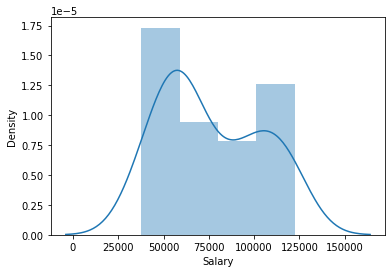

In [12]:
import seaborn as sns
sns.distplot(Salary_data.Salary)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


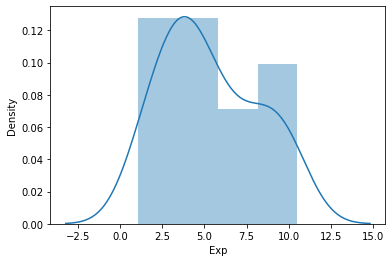

In [13]:
sns.distplot(Salary_data.Exp)

Inference : From above histograms we can say data is normally distributed 

{'boxes': [<matplotlib.lines.Line2D at 0x7f0d2e5dd450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0d2e582490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d2e58d4d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d2e582f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0d2e5dd990>,
  <matplotlib.lines.Line2D at 0x7f0d2e5dd610>]}

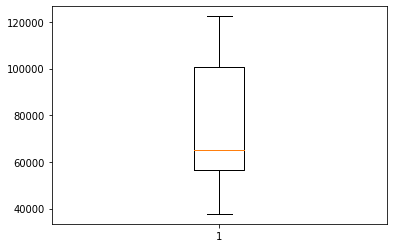

In [14]:
plt.boxplot(Salary_data.Salary)

{'boxes': [<matplotlib.lines.Line2D at 0x7f0d2e597410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0d2e564210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d2e5ca9d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d2e58df50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0d2e599290>,
  <matplotlib.lines.Line2D at 0x7f0d2e59ce50>]}

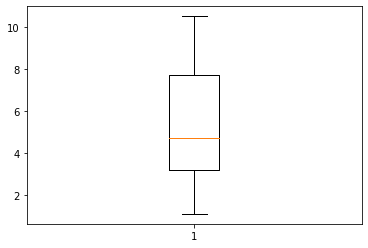

In [15]:
plt.boxplot(Salary_data.Exp)

Inference : From boxplots we can identify, there is no outlier in dataset

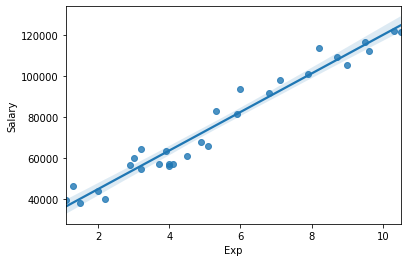

In [16]:
sns.regplot(x="Exp", y="Salary", data=Salary_data);

In [18]:
Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exp     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Inference : There is no null values in dataset

# **Correlation Analysis**

In [19]:
Salary_data.corr()

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


# **Model Building**

In [42]:
import statsmodels.formula.api as smf
model_data = Salary_data
model = smf.ols('Salary~Exp', data=model_data).fit()

# **Model Testing**

In [43]:
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [44]:
print(model.tvalues, '\n' , model.pvalues)

Intercept    11.346940
Exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
Exp          1.143068e-20
dtype: float64


In [45]:
print(model.rsquared, model.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        20:39:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference : Since the R square value is .95, we can say it is a good model

# **Model Prediction**

In [35]:
# predicting salary for 12 & 13 years of experince
newdata = pd.Series([12,13]) 

In [33]:
data_pred = pd.DataFrame(newdata,columns=['Exp'] )
data_pred

,Exp
0,3
1,5


In [48]:
model_pred = model.predict(data_pred)
print(model1_pred)

0    54142.087163
1    73042.011806
dtype: float64
